In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [6]:
data_visualize = pd.read_csv("noRH_pd.csv")

data_visualize

,DAT,WL_Flume (m3/hour),WL_Flume_OUT (m3/hour),Solar (W/m2),Precipitation (mm),WindSpeed (m/s),AirTemp (DegC),delta PD (mm)
0,164.791667,0.024406,0.156048,42,0.000,1.23,24.20,-0.1
1,164.833333,0.031719,0.136486,4,0.000,0.79,23.30,-0.1
2,164.875000,0.031719,0.136486,0,0.000,0.60,22.80,-0.1
3,164.916667,0.031719,0.060883,0,0.000,0.48,22.60,-0.1
4,164.958333,0.040201,0.049905,0,1.766,0.72,22.60,0.2
...,...,...,...,...,...,...,...,...
2442,267.250000,0.000000,0.000000,0,0.000,0.81,2.29,-0.1
2443,267.291667,0.000000,0.000000,12,0.000,0.76,2.33,0.0
2444,267.333333,0.000000,0.000000,82,0.017,0.88,2.12,0.0
2445,267.375000,0.000000,0.000000,195,0.000,0.76,1.91,0.0


In [12]:
LEARNING_RATE = 0.0001
TRAINNING_STEP = 200000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [13]:
data = np.loadtxt("noRH_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w1 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [14]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w1:\n', w1.numpy(), '\n', 'w2:\n', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w1:
 [[ 0.1628131 ]
 [-0.65803427]
 [ 0.00707708]
 [-0.01720829]
 [-0.15320113]
 [-0.6013319 ]
 [-0.4655727 ]] 
 w2:
 [[-0.26874277]
 [-0.6751704 ]
 [-0.07016377]
 [ 0.2494466 ]
 [-0.37061572]
 [ 0.15968546]
 [-0.0539996 ]] 
 bias: -0.078275695 
 loss: 52063708.0 

step: 20000 
 w1:
 [[ 5.6948173e-03]
 [-6.9363958e-01]
 [-4.1269329e-03]
 [ 2.8005905e-05]
 [-9.8776311e-02]
 [-6.6087818e-01]
 [-4.3597606e-01]] 
 w2:
 [[-0.39918196]
 [-0.73391485]
 [-0.08496223]
 [ 0.19916604]
 [-0.35242027]
 [ 0.07253481]
 [-0.04729426]] 
 bias: -0.18163082 
 loss: 18106.305 

step: 30000 
 w1:
 [[ 7.0440711e-04]
 [-2.4101339e-02]
 [ 2.2937816e-02]
 [-2.8357779e-06]
 [ 2.7233012e-02]
 [-2.8326058e-01]
 [-2.6254382e-03]] 
 w2:
 [[-0.190449  ]
 [-0.0926469 ]
 [ 0.18654712]
 [ 0.00175969]
 [-0.08810101]
 [ 0.3740118 ]
 [ 0.39956492]] 
 bias: 0.1640726 
 loss: 8.2227545 

step: 40000 
 w1:
 [[ 1.8097363e-04]
 [ 3.7404804e-03]
 [-1.6455690e-03]
 [ 7.8414715e-09]
 [ 1.0322209e-02]
 [-1.2843436e-0

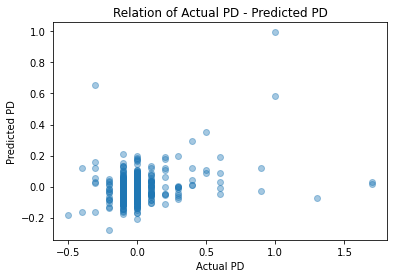

In [15]:
y_hat = tf.matmul(x_test * x_test, w1) + tf.matmul(x_test, w2) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [16]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.17649175
MAE: 0.09655379
